## Softmax

In [1]:
import numpy as np

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

## 用opencc将繁体字转化成简体,得到文件wiki_simplified

In [34]:
import jieba
import re
fin = open('D:\Github_project\data\wiki\wiki_simplified', 'r', encoding='utf-8')
fou = open('D:\Github_project\data\wiki\wiki_simplified_cut', 'w', encoding='utf-8')
line = fin.readline()
i = 0
while line: 
    # 去掉空行
    if line == '\n':
        line = fin.readline()
        continue
        
    # 只提取中文
    line = ''.join(re.findall('[\u4e00-\u9fa5]',line))
    newline = jieba.cut(line, cut_all=False)
    str_out = ' '.join(newline)
    fou.writelines(str_out)
    fou.write('\n')# 这一步一定要有，每个句子分开，最后会形成一个以句子为一个子列表形成的嵌套列表
    line = fin.readline()    

fin.close()
fou.close()

In [36]:
fin = open('D:\Github_project\data\wiki\wiki_simplified_01', 'r', encoding='utf-8')
fou = open('D:\Github_project\data\wiki\wiki_simplified_cut', 'a', encoding='utf-8')
line = fin.readline()
while line:
    if line == '\n':
        line = fin.readline()
        continue
    line = ''.join(re.findall('[\u4e00-\u9fa5]',line))
    newline = jieba.cut(line, cut_all=False)
    str_out = ' '.join(newline)
    fou.writelines(str_out)
    fou.write('\n')
    line = fin.readline()    
fin.close()
fou.close()

In [38]:
from gensim.models import word2vec

In [39]:
corpus = word2vec.Text8Corpus('D:\Github_project\data\wiki\wiki_simplified_cut')

In [42]:
corpus_line = word2vec.LineSentence('D:\Github_project\data\wiki\wiki_simplified_cut')

## 两种包的区别，Text8Corpus是以一万为单位取，LineSentence是以句子为单位

In [48]:
# Word2vec.w2v是在服务器上训练出来的词向量模型文件
# 相关参数设置：
# corpus = word2vec.LineSentence('D:\Github_project\data\wiki\wiki_simplified_cut')
# model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=20000, workers=4)
word2vec = word2vec.Word2Vec.load("./Word2vec.w2v").wv

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager
plt.rcParams['font.sans-serif'] = ['SimHei']

In [50]:
word2vec.wv['我']

C:\Users\Ryan Wu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([-0.30591697, -2.5419981 , -0.7213372 ,  3.200858  , -3.8570545 ,
       -2.236507  ,  1.732909  ,  4.1560564 , -1.6145769 ,  0.27676836,
       -0.18779878,  2.2308085 , -5.042654  ,  4.1482496 ,  6.8472967 ,
        3.0318    ,  7.0099835 ,  2.1807215 ,  5.8773885 ,  1.6927416 ,
       -0.17714573,  4.8652925 ,  0.4695297 , -1.8845264 , -3.7463808 ,
       -5.177522  ,  4.7676134 , -1.0264294 , -2.8375719 ,  3.7646663 ,
        4.7963424 , -4.289494  ,  4.5820303 , -0.13058285,  3.7030153 ,
       -1.6425992 , -4.6635976 , -3.5633745 , -0.69282913, -1.4902626 ,
       -0.1316002 , -1.0597739 , -2.7830803 ,  2.9649854 ,  1.9273392 ,
        1.7244596 , -6.4544616 ,  5.8501844 ,  4.7451487 ,  3.49623   ,
       -3.8780339 , -1.9270467 , -0.82855964, -5.0774183 , -1.70815   ,
       -0.81291246, -1.1375903 , -0.92502046, -0.9306219 , -3.3257298 ,
        1.0047175 , -1.4400841 ,  3.2474792 ,  1.6597992 , -0.70819277,
        0.25025174,  2.423789  ,  0.08558786,  1.4682883 , -1.30

In [51]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\Ryan Wu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


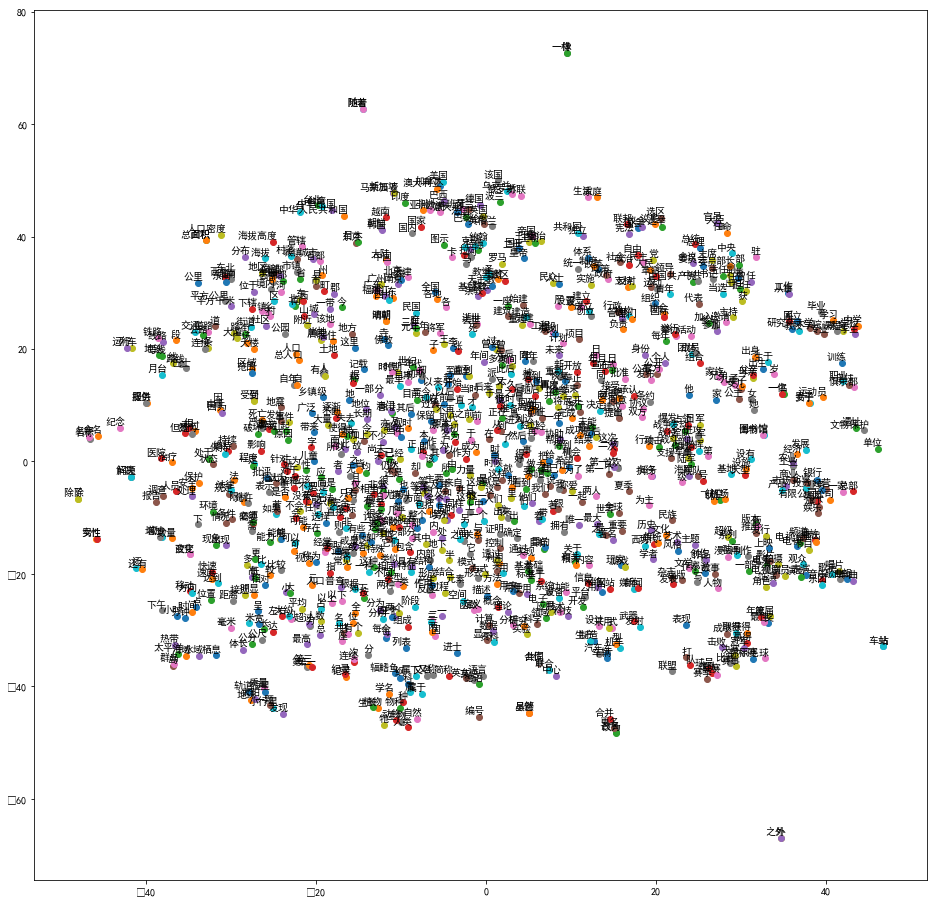

In [53]:
tsne_plot(word2vec)

In [54]:
word2vec.most_similar('时间')

[('分钟', 0.6116923689842224),
 ('小时', 0.5783238410949707),
 ('点', 0.574209988117218),
 ('一年', 0.5025225877761841),
 ('需要', 0.47368401288986206),
 ('计算', 0.4204166829586029),
 ('速度', 0.41901808977127075),
 ('变化', 0.4045896530151367),
 ('播出', 0.40266844630241394),
 ('需', 0.3887570798397064)]

In [55]:
word2vec.most_similar('音乐')

[('歌曲', 0.6741806864738464),
 ('表演', 0.670306384563446),
 ('乐团', 0.665121853351593),
 ('创作', 0.6501174569129944),
 ('歌手', 0.6499392986297607),
 ('专辑', 0.5857124328613281),
 ('艺术', 0.5763508081436157),
 ('风格', 0.5744481086730957),
 ('唱片', 0.568749725818634),
 ('演出', 0.5631359815597534)]

In [56]:
word2vec.similarity("民主", "自由")

0.6164282

In [57]:
word2vec.similarity("亚洲", "欧洲")

0.55866194

In [58]:
word2vec.similarity("自由", "欧洲")

0.16760556

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

## 下面是skip-gram方法结果

In [60]:
# Word2vec_skipGram是在服务器上训练出来的词向量模型文件
# 相关参数设置：model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=20000, workers=4，sg=1)
from gensim.models import word2vec
word2vec_skipGram = word2vec.Word2Vec.load("./Word2vec_skipGram.w2v").wv

In [61]:
word2vec_skipGram.most_similar('时间')

[('点', 0.6990652084350586),
 ('小时', 0.6293907165527344),
 ('分钟', 0.6261861324310303),
 ('一年', 0.5623470544815063),
 ('播出', 0.541483998298645),
 ('需要', 0.5403778553009033),
 ('特别', 0.5390465259552002),
 ('起', 0.5210808515548706),
 ('完成', 0.5142911672592163),
 ('需', 0.5126736164093018)]

In [62]:
word2vec_skipGram.most_similar('音乐')

[('歌曲', 0.8215473890304565),
 ('歌手', 0.8203747868537903),
 ('专辑', 0.8069183826446533),
 ('唱片', 0.8060582876205444),
 ('乐团', 0.7838618755340576),
 ('创作', 0.779641330242157),
 ('表演', 0.7602564096450806),
 ('制作', 0.7452100515365601),
 ('娱乐', 0.7285340428352356),
 ('作品', 0.6973516345024109)]

In [63]:
word2vec_skipGram.similarity("民主", "自由")

0.630559

In [64]:
word2vec_skipGram.similarity("亚洲", "欧洲")

0.68849605

In [65]:
word2vec_skipGram.similarity("北京", "欧洲")

0.2461698

In [66]:
word2vec_skipGram.similarity("北京", "亚洲")

0.35286403

In [67]:
word2vec_skipGram.similarity("北京", "中国")

0.6857835

In [68]:
word2vec_skipGram.similarity("北京", "南京")

0.73107374

C:\Users\Ryan Wu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


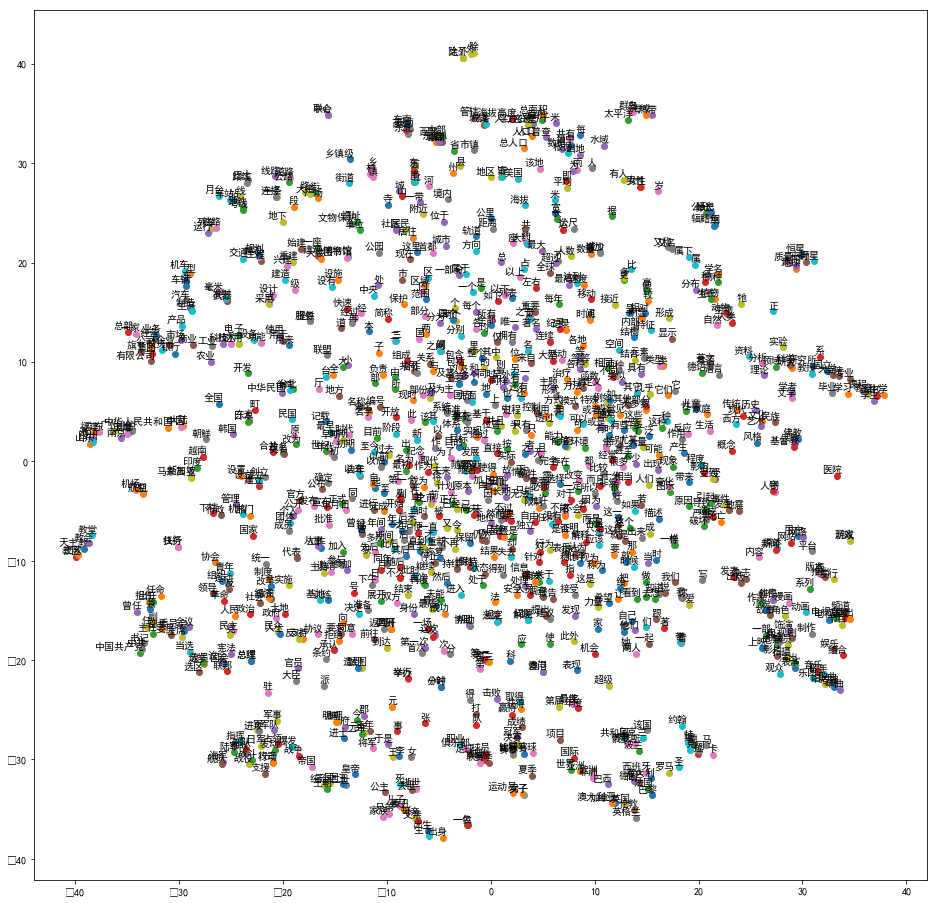

In [69]:
tsne_plot(word2vec_skipGram)

## 运行过程明显发现这种方法要慢一些，因为其复杂度比较高，具体文章https://blog.csdn.net/qq_36732844/article/details/97775617